In [1]:
import pandas as pd
import numpy as np

In [2]:
import time
import calendar
timestamp = 1430352000 	
#Convert timestamp to a volume to object with UTC time
dt = time.gmtime(timestamp)


print(dt)

date_string = time.strftime("%d/%m/%Y", dt)
print(date_string)

time.struct_time(tm_year=2015, tm_mon=4, tm_mday=30, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=3, tm_yday=120, tm_isdst=0)
30/04/2015


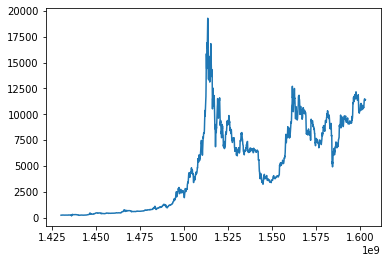

In [3]:
import matplotlib.pyplot as plt
df = pd.read_csv("cryptocompare_btc.csv")
Y = df['volumeto']/df['volumefrom']
plt.plot(df['time'],Y)
#Polynomial Regression should be more beneficial in this case

In [4]:
df['average'] = Y
df


,time,high,low,open,close,volumefrom,volumeto,average
0,1430179200,229.87,222.03,228.96,225.81,65971.19,1.489642e+07,225.801877
1,1430265600,227.24,222.25,225.81,225.42,60889.41,1.374334e+07,225.709862
2,1430352000,240.01,224.68,225.42,235.77,112238.62,2.624220e+07,233.807194
3,1430438400,239.42,232.38,235.77,233.21,60139.08,1.417842e+07,235.760510
4,1430524800,236.38,231.73,233.21,235.34,37075.60,8.703583e+06,234.752306
...,...,...,...,...,...,...,...,...
1996,1602633600,11550.25,11298.88,11427.29,11429.30,22758.20,2.597119e+08,11411.794606
1997,1602720000,11607.59,11269.05,11429.30,11508.31,33044.49,3.778013e+08,11433.109208
1998,1602806400,11545.35,11224.89,11508.31,11326.25,29300.16,3.323206e+08,11341.937358
1999,1602892800,11410.01,11270.69,11326.25,11367.65,9901.25,1.123061e+08,11342.614448


In [5]:
df = df.dropna()

In [6]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)
x = train['time']
y = train['average']
#x = (x - x.mean()) / x.std() #feature scaling of x
#x = np.c_[np.ones(x.shape[0]), x] #for multiplication in gradient descent

In [7]:
def statisticalLinearRegression(X,Y):
    X = X.values
    Y = Y.values
    mean_x = np.mean(X)
    mean_y = np.mean(Y)
    m = len(X)
    n,d =0,0
    for i in range(m):
        n += (X[i] - mean_x) * (Y[i] - mean_y)
        d += (X[i] - mean_x) ** 2
    m = n / d
    c = mean_y - (m * mean_x)
    return m,c
        

In [8]:
mOp,cOp = statisticalLinearRegression(train['time'],train['average'])

statPred = cOp + mOp*train['time']

In [9]:
def OptimizedLinearRegression(X,Y,iterations,lr,theta):
    costs = []
    thetas = [theta]
    for i in range(iterations):
        pred = np.dot(X, theta)
        error = pred - y
        cost = 1/(2*m) * np.dot(error.T, error)
        costs.append(cost)
        theta = theta - (lr * (1/m) * np.dot(x.T, error))
        thetas.append(theta)
        
    return thetas, costs

In [10]:
lr = 0.01
iterations = 2000
x = train['time']
y = train['average']


x = (x - x.mean()) / x.std() #feature scaling
x = np.c_[np.ones(x.shape[0]), x]

m = y.size 
np.random.seed(123) 
theta = np.random.rand(2) #Pick random values to start with



weights, costs = OptimizedLinearRegression(x,y,iterations,lr,theta)

In [11]:
print(mOp)
print(cOp)
print(weights)
w0 = weights[-1][0]
w1 = weights[-1][1]

6.702801098677847e-05
-96669.36565514801
[array([0.69646919, 0.28613933]), array([50.27745418, 33.62309601]), array([99.36262932, 66.62689148]), array([147.95695271,  99.30085527]), array([196.06533287, 131.64828363]), array([243.69262922, 163.67243988]), array([290.84365261, 195.37655472]), array([337.52316577, 226.76382656]), array([383.73588379, 257.83742185]), array([429.48647464, 288.6004754 ]), array([474.77955958, 319.05609069]), array([519.61971367, 349.20734016]), array([564.01146621, 379.05726559]), array([607.95930123, 408.60887833]), array([651.4676579 , 437.86515964]), array([694.54093101, 466.82906098]), array([737.18347138, 495.50350434]), array([779.39958635, 523.89138247]), array([821.19354017, 551.99555925]), array([862.56955445, 579.81886992]), array([903.53180859, 607.36412137]), array([944.08444019, 634.63409247]), array([984.23154547, 661.63153429]), array([1023.9771797 ,  688.35917043]), array([1063.32535759,  714.81969725]), array([1102.28005369,  741.01578419])

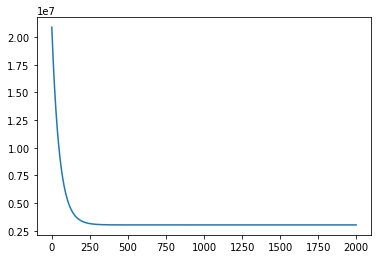

In [12]:
plt.plot(costs)
plt.show()

In [13]:
xTest = test['time']
yTest = test['average']

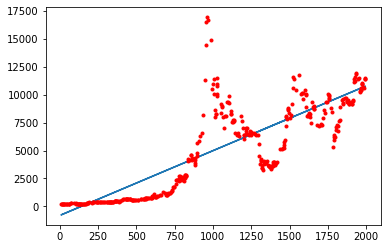

In [14]:
testpred = cOp + mOp*xTest
plt.plot(testpred)
plt.plot(yTest,'r.')

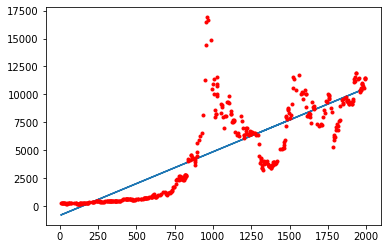

In [15]:
xTest = (xTest - xTest.mean()) / xTest.std()
optestpred = w0 + w1*xTest
plt.plot(optestpred)
plt.plot(yTest,'r.')


In [16]:
def OptimizedMultiLinearRegression(X1,X2,Y,iterations,lr,theta):
    costs = []
    thetas = [theta]
    m = Y.size
    for i in range(iterations):
        pred = np.dot(X1, theta)
        pred += np.dot(X2, theta)
        error = pred - y
        cost = 1/(2*m) * np.dot(error.T, error)
        costs.append(cost)
        theta = theta - (lr * (1/m) * np.dot(X1.T, error))
        thetas.append(theta)
        
    return thetas, costs

In [17]:
lr = 0.01
iterations = 2000
x1 = train['time']
x2 = train['high']
y = train['average']


x1 = (x1 - x1.mean()) / x1.std() #feature scaling
x1 = np.c_[np.ones(x1.shape[0]), x1]
x1 = np.c_[np.ones(x1.shape[0]), x1]

x2 = (x2 - x2.mean()) / x2.std() #feature scaling
x2 = np.c_[np.ones(x2.shape[0]), x2]
x2 = np.c_[np.ones(x2.shape[0]), x2]
m = y.size 
np.random.seed(1234) 
theta = np.random.rand(3) 



weights, costs = OptimizedMultiLinearRegression(x1,x2,y,iterations,lr,theta)

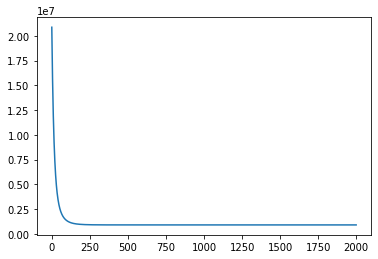

In [18]:
plt.plot(costs)

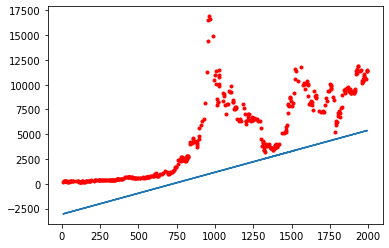

In [19]:
xTest = (xTest - xTest.mean()) / xTest.std()
xTest2 = test['high']
xTest2 = (xTest2 - xTest2.mean()) / xTest2.std()
w0 = weights[-1][0]
w1 = weights[-1][1]
w2 = weights[-1][1]
op2testpred = w0 + w1*xTest +w2*xTest
plt.plot(op2testpred)
plt.plot(test['average'],'.r')

In [20]:
theta = [0,0,0,0,0,0,0]
for i in range(0,6):
    x = train.iloc[:, i].values #Feature matrix
    y = train.iloc[:, 7].values #Criterion Matrix
    x_bias = np.ones((1600,1))
    x = np.reshape(x,(1600,1))
    updatedx = np.append(x_bias,x,axis=1)
    xtranspose = np.transpose(x)   
    xtranspose_dot_x = xtranspose.dot(x) 
    temp_1 = np.linalg.inv(xtranspose_dot_x)
    temp_2 = xtranspose.dot(y) 
    theta[i] = temp_1.dot(temp_2)


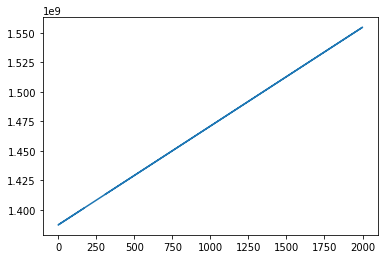

In [21]:
statPred = theta[0] + theta[1]*train['time'] + theta[2]*train['high']
statPred
plt.plot(statPred)